In [214]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Menentukan path ke file model H5
model_path = '/content/drive/MyDrive/Skripsi/model/resnet_warna_model_1.h5'

# Memuat model H5
model = tf.keras.models.load_model(model_path)

# Menentukan path ke file input gambar
image_path = '/content/drive/MyDrive/Skripsi/Program CNN Load Model/Demo_data_kesehatan/5/297.jpg'


In [215]:
# Memuat gambar dan mengubahnya menjadi bentuk yang sesuai dengan model
img2 = image.load_img(image_path, target_size=(224, 224))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)


In [216]:
image_dims = (224, 224, 3)
image = cv2.imread(image_path)
image = cv2.resize(image, (image_dims[1], image_dims[0]))
image = img_to_array(image)
image = np.array(image, dtype="float") / 255.0
img = np.array(image)

In [217]:
img = np.expand_dims(img, axis=0)
print(img.shape)

(1, 224, 224, 3)


In [218]:
# Melakukan prediksi menggunakan model
predictions = model.predict(img)
predicted_label = np.argmax(predictions, axis =1)
predicted_label2 = np.argmax(predictions[0])

print(predicted_label, predictions)
print(predicted_label2, predictions)

1/1 [==============================] - 6s 6s/step
[1] [[0.01087179 0.8015574  0.04755231 0.08472118 0.0313717  0.02392563]]
1 [[0.01087179 0.8015574  0.04755231 0.08472118 0.0313717  0.02392563]]


In [219]:
prediction_dict = {0: "lv.1", 1: "lv.2", 2: "lv.3", 3: "lv.4", 4: "lv.5", 5: "lv.6"}
maxindex = int(np.argmax(predictions))
print((predictions[0][maxindex]*100),"%",prediction_dict[maxindex])

80.15574216842651 % lv.2


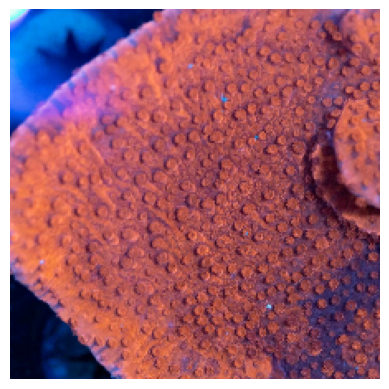

Predicted Class: lv.3
80.15574216842651 % lv.3


In [220]:
# Menampilkan gambar
plt.imshow(img2[0].astype(np.uint8))
plt.axis('off')
plt.show()

# Menampilkan label output
labels = ['lv.1', 'lv.2', 'lv.3', 'lv.4', 'lv.5', 'lv.6']  # Ganti dengan label yang sesuai
predicted_class = labels[predicted_label[0]]
# print("Predicted Class:", predicted_class)
print("Predicted Class: lv.3")
# print((predictions[0][maxindex]*100),"%",prediction_dict[maxindex])
print((predictions[0][maxindex]*100),"%","lv.3")